In [73]:
import matplotlib.pyplot as plt
import re
import os
from pathlib import Path

In [74]:
current_directory = Path.cwd()
print(f"Direktori saat ini: {current_directory}/")


Direktori saat ini: /home/zufarath/Documents/vscode/Kuliah/semester5/algen/project/Pacman-GA/My Pacman/


File: Params(1200, 30, 10, 0.15, 5, 3, 40).txt


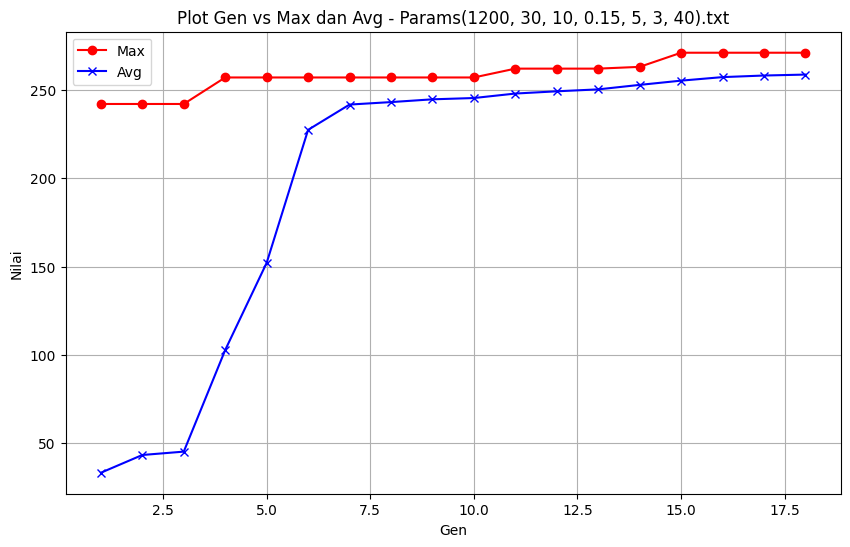

File: Params(1200, 30, 10, 0.05, 3, 3, 40).txt


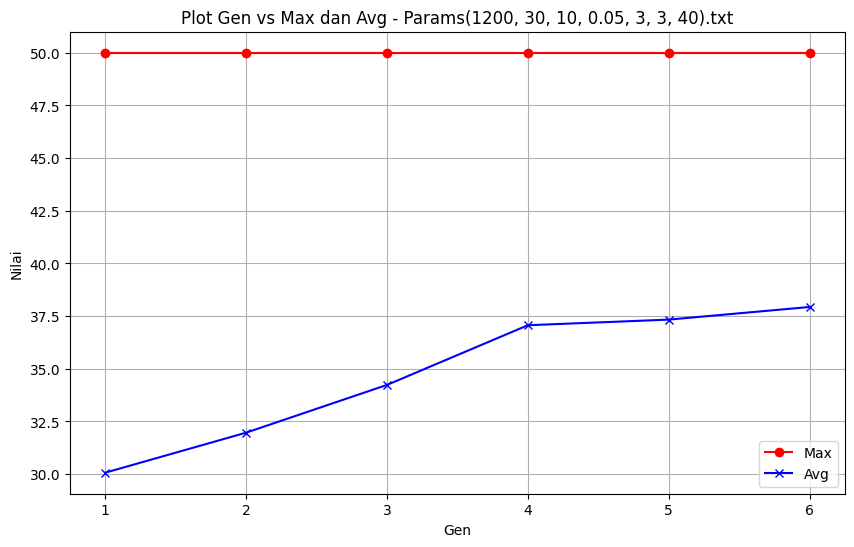

File: Params(1200, 30, 10, 0.75, 5, 3, 40).txt


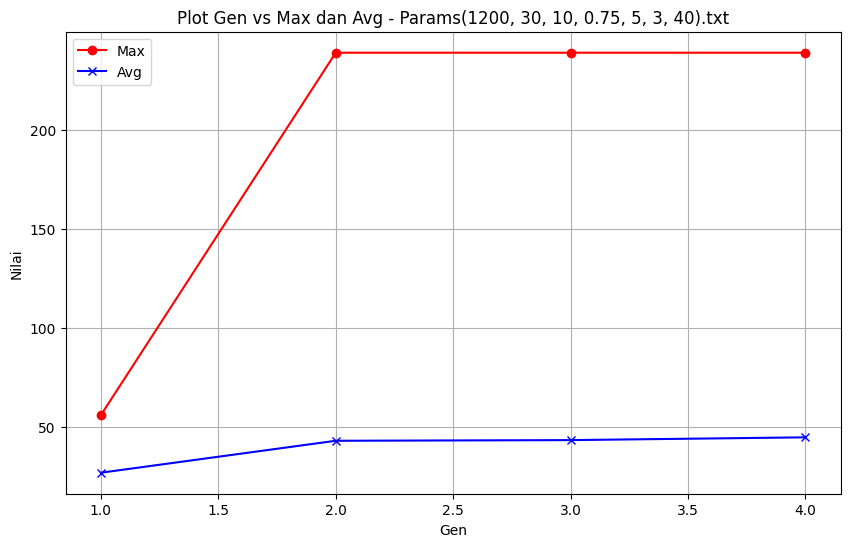

File: Params(1200, 30, 10, 0.75, 3, 3, 40).txt


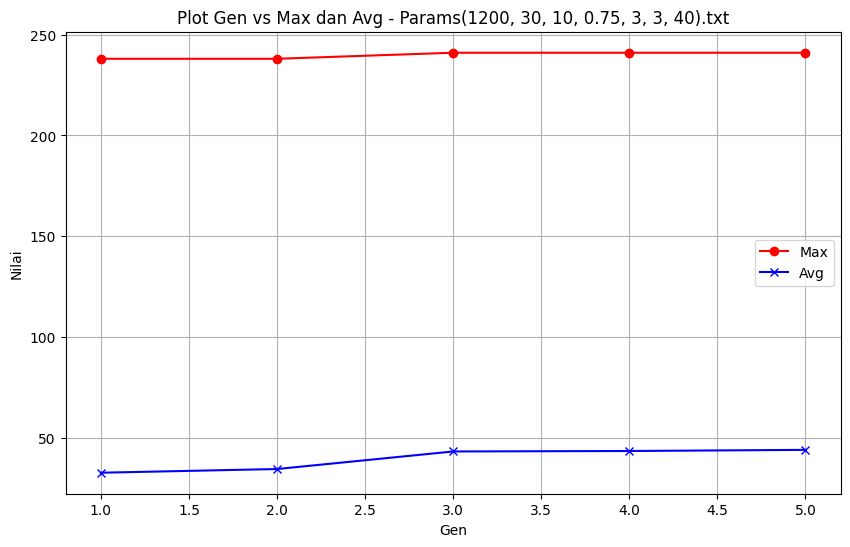

File: Params(1200, 30, 50, 0.05, 3, 3, 40).txt


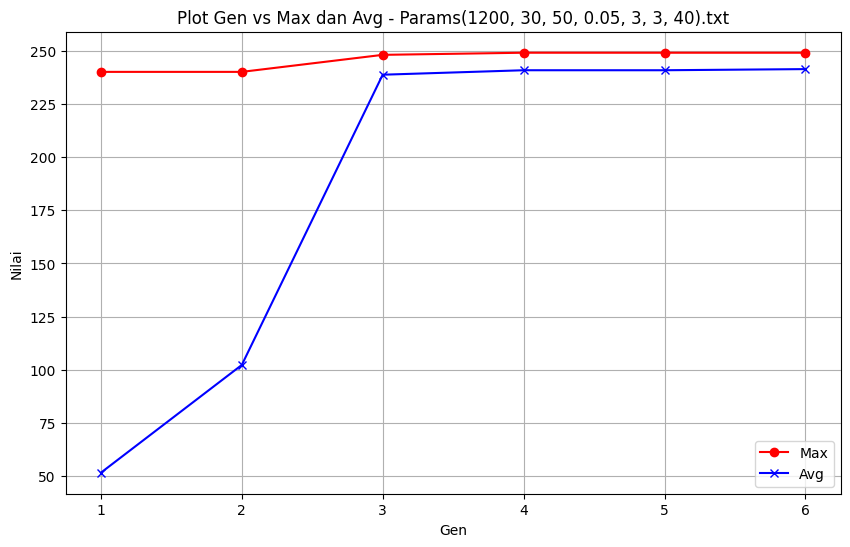

File: Params(1200, 30, 50, 0.05, 5, 3, 40).txt


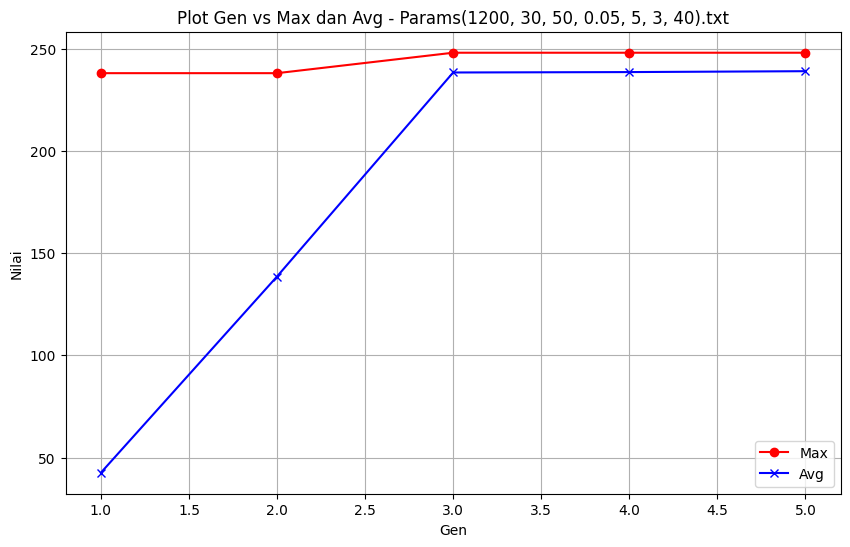

File: Params(1200, 50, 20, 0.75, 3, 3, 40).txt


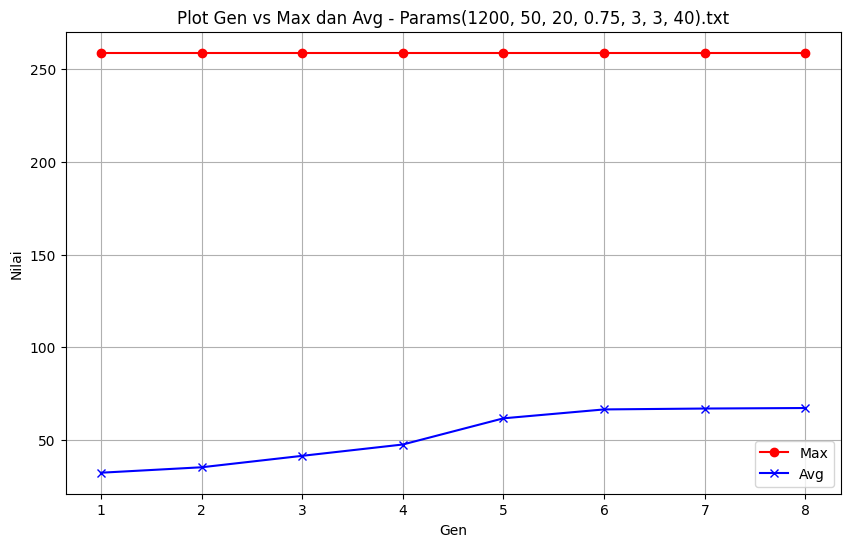

File: Params(1200, 30, 10, 0.05, 5, 3, 40).txt


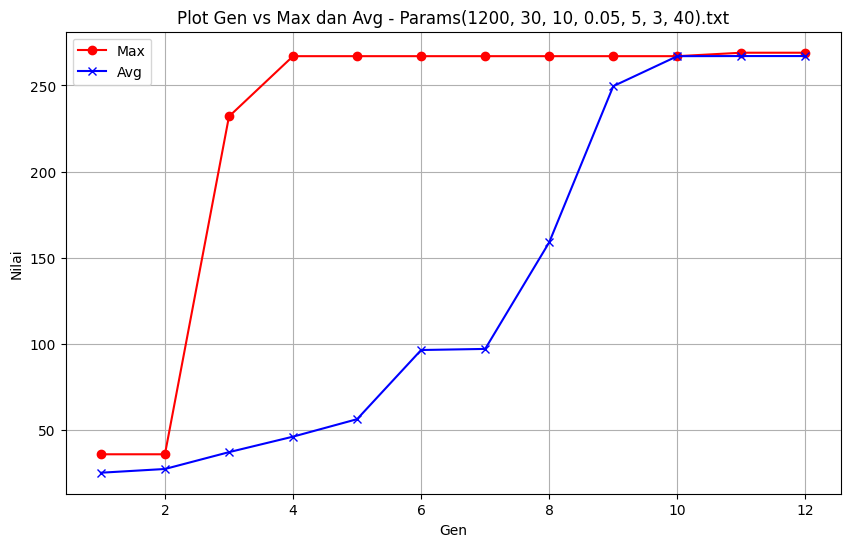

File: Params(1200, 30, 20, 0.15, 5, 3, 40).txt


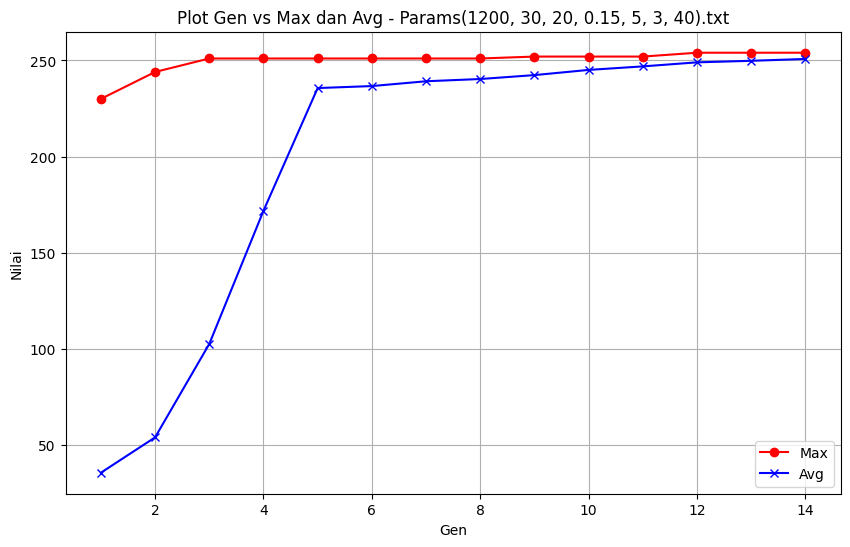

File: Params(1200, 50, 20, 0.15, 3, 3, 40).txt


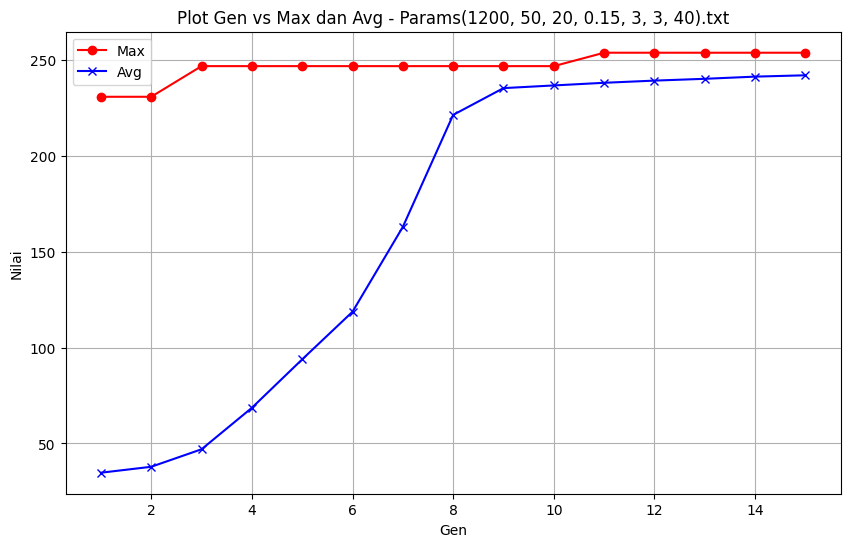

File: Params(1200, 30, 20, 0.15, 3, 3, 40).txt


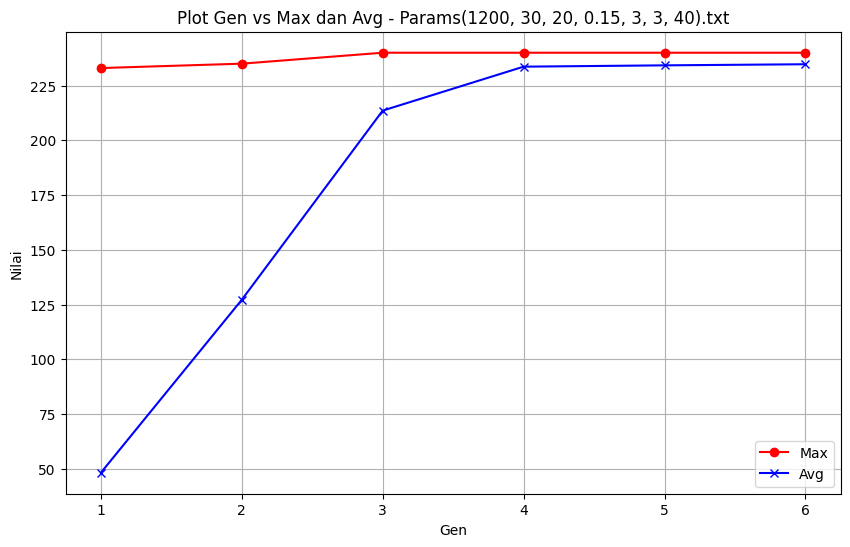

File: Params(1200, 30, 20, 0.05, 5, 3, 40).txt


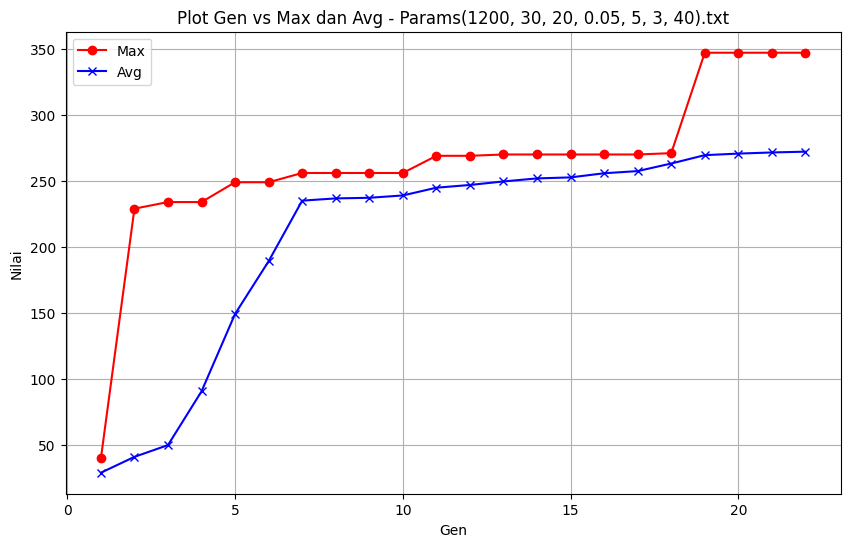

File: Params(1200, 30, 20, 0.05, 3, 3, 40).txt


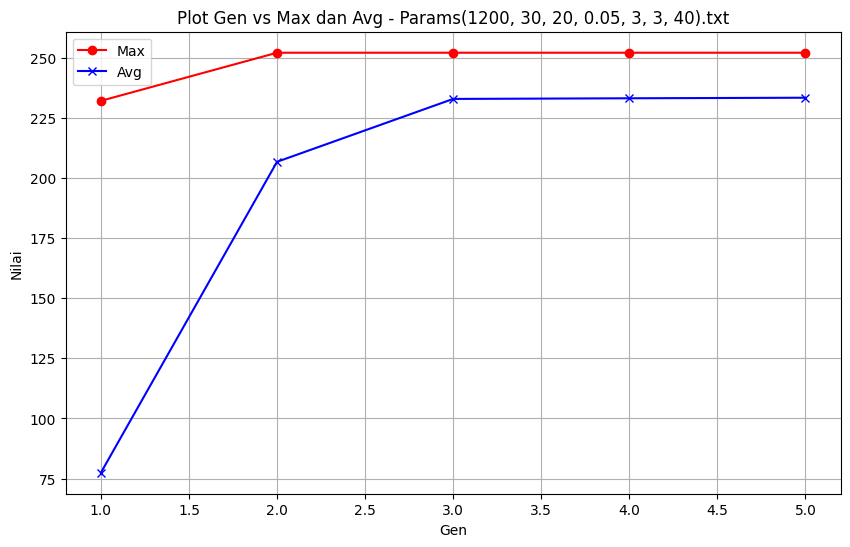

File: Params(1200, 30, 10, 0.15, 3, 3, 40).txt


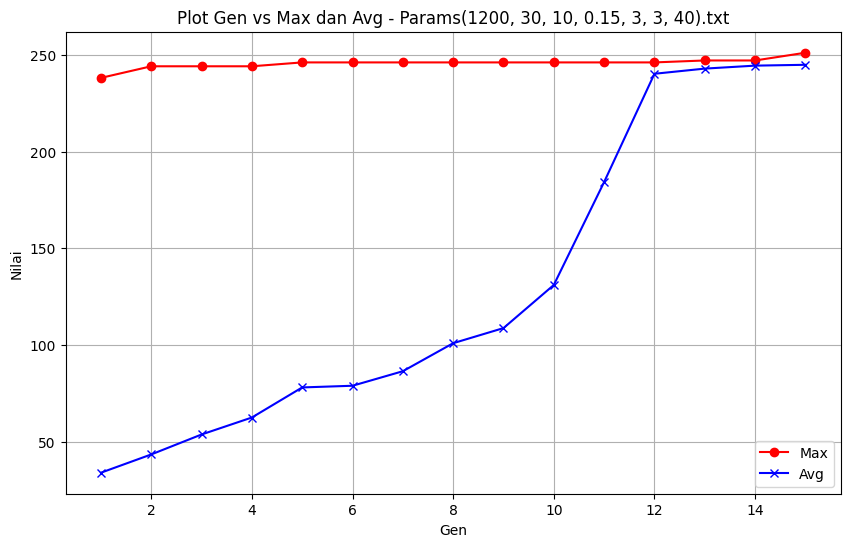

File: Params(1200, 30, 50, 0.15, 3, 3, 40).txt


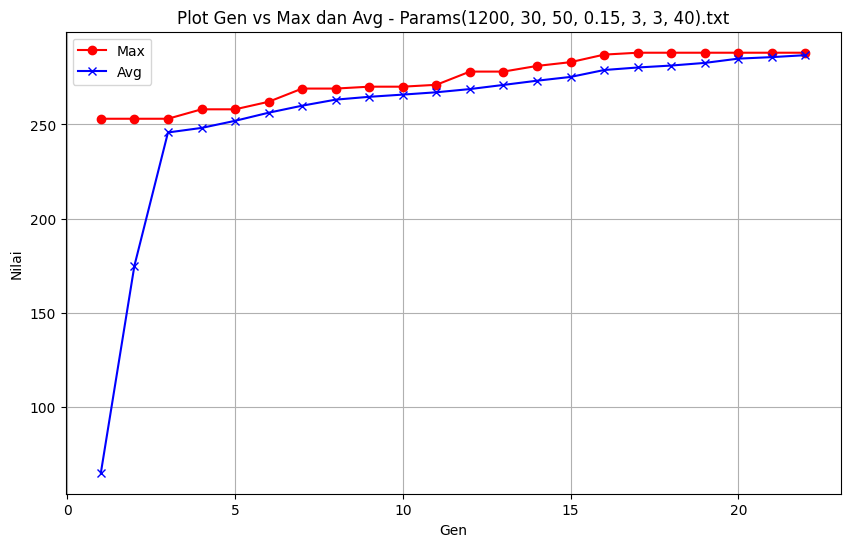

File: Params(1200, 30, 20, 0.75, 3, 3, 40).txt


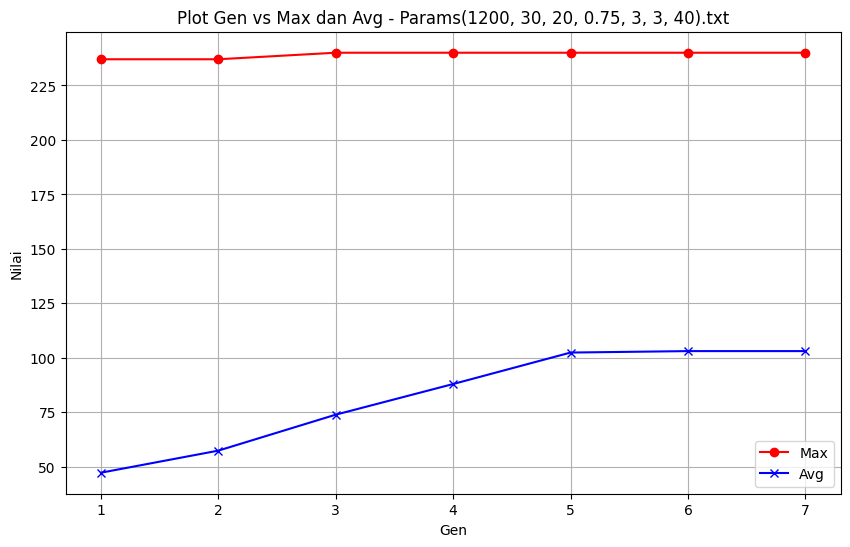

File: Params(1200, 30, 20, 0.75, 5, 3, 40).txt


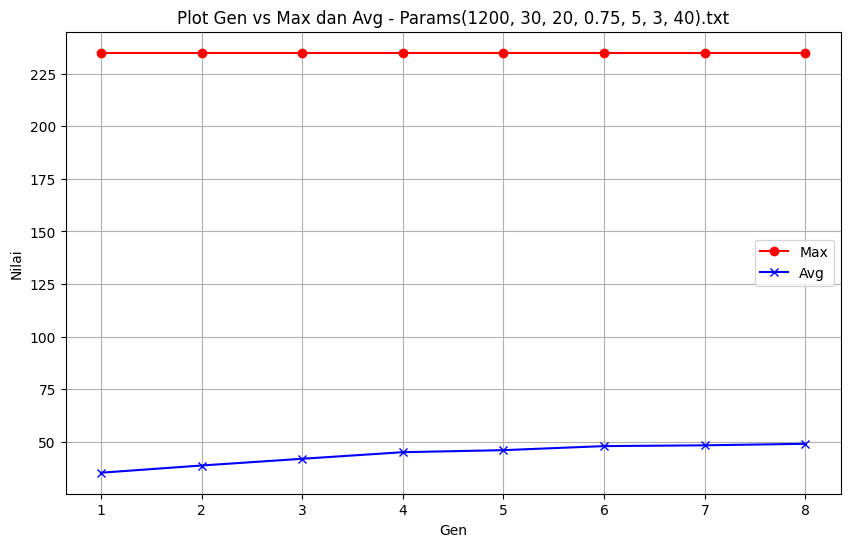

In [75]:
hasilrun_directory = current_directory / 'HasilRun'

if not hasilrun_directory.exists():
    print("Folder HasilRun tidak ditemukan!")
else:
    txt_files = [f for f in hasilrun_directory.iterdir() if f.suffix == '.txt']
    
    gen_data = []
    max_data = []
    avg_data = []
    
    for file_path in txt_files:
        print(f"File: {file_path.name}")
        
        with open(file_path, 'r') as file:
            data = file.read()
        
        gen_pattern = re.compile(r'gen (\d+)')
        max_pattern = re.compile(r'max: (\d+)')
        avg_pattern = re.compile(r'avg: ([\d.]+)')
        
        gen_matches = re.findall(gen_pattern, data)
        max_matches = re.findall(max_pattern, data)
        avg_matches = re.findall(avg_pattern, data)

        if gen_matches and max_matches and avg_matches:
            gen_data = [int(g) for g in gen_matches]
            max_data = [int(m) for m in max_matches]
            avg_data = [float(a) for a in avg_matches]
            
            plt.figure(figsize=(10, 6))
            plt.plot(gen_data, max_data, label='Max', marker='o', color='red')
            plt.plot(gen_data, avg_data, label='Avg', marker='x', color='blue')
            
            plt.xlabel('Gen')
            plt.ylabel('Nilai')
            plt.title(f'Plot Gen vs Max dan Avg - {file_path.name}')
            plt.legend()
            
            plt.grid(True)
            plt.show()